# Objective 

**Making an Artificial Neural Network to predict this customer will leave the Bank or not in next 6 months.**

**Description of Dataset**
- Dataset have 14 columns and 10000 rows
- Columns are:
> - Row number 
> - Custormer id
> - Surname
> - CreaditScore
> - Geography(location)
> - Gender
> - Age
> - Tenure (how long this customer is member of bank)
> - Balance
> - Number of products customer has
> - Has a creadit card
> - Is this customer is a activer member or not
> - Estimated salary
> - Exited label after 6 months

Now import libraries for set work environment

In [1]:
# import libraries
import numpy as np
import pandas as pd 

To read the data from csv format

In [2]:
dataset = pd.read_csv("churn_modelling.csv")

To check head part of the data

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Now split the data into 2 variables 
- dataset without labels
- dataset with only labels 

In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [5]:
print(X)
print("\n\nType of this data is :",type(X))
print("\n\nshape of this data is :",X.shape)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Type of this data is : <class 'numpy.ndarray'>


shape of this data is : (10000, 10)


In [34]:
# CHECKING BASIC INFORMATION
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**observation** there is not any missing value in this dataset

# Snapshot of the Independent variables dataset
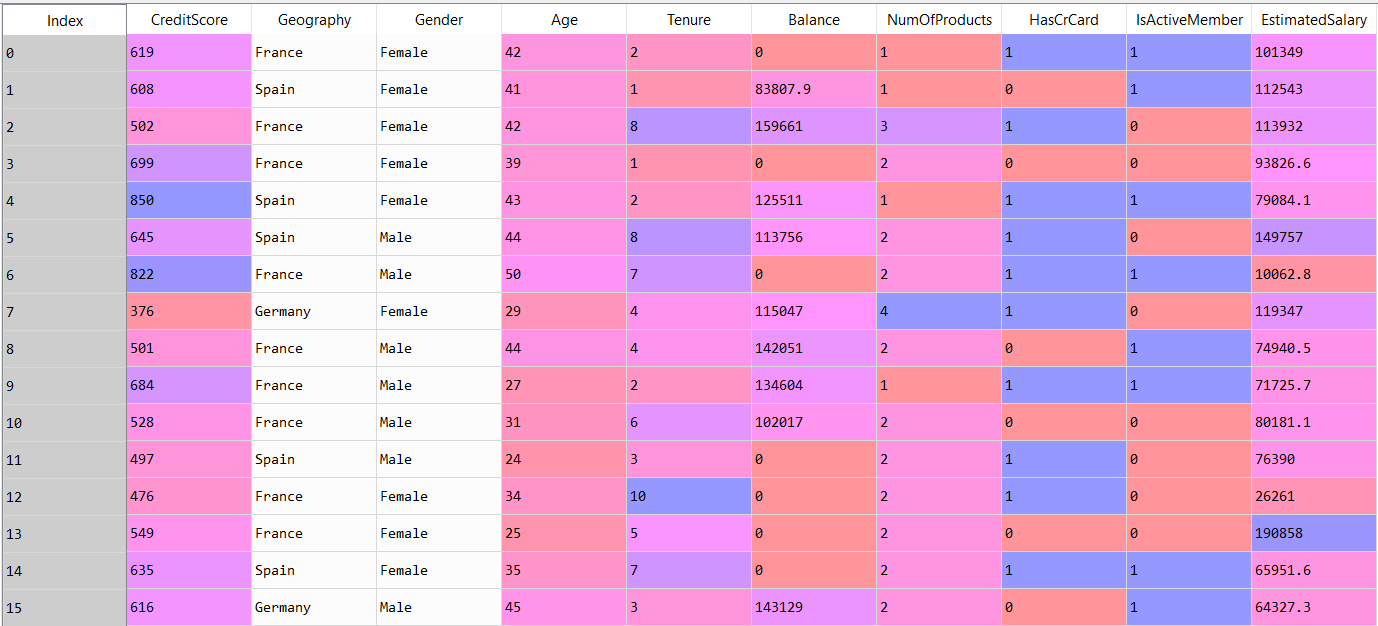

In [6]:
print(y)
print("\n\nType of this data is :",type(y))
print("\n\n shape of this data is :",y.shape)

[1 0 1 ... 1 1 0]


Type of this data is : <class 'numpy.ndarray'>


 shape of this data is : (10000,)


# snapshot of dependent variable
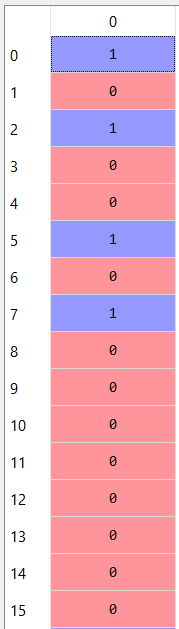

#### Now we have to perform some encoding for the categorical (Example: city, gender)

In order to do this we have to import some library

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
cityencoder = LabelEncoder()
X[:, 1] = cityencoder.fit_transform(X[:, 1])

In [10]:
genderencoder = LabelEncoder()
X[:, 2] = genderencoder.fit_transform(X[:, 2])

In [11]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

#### Dataset after encoding

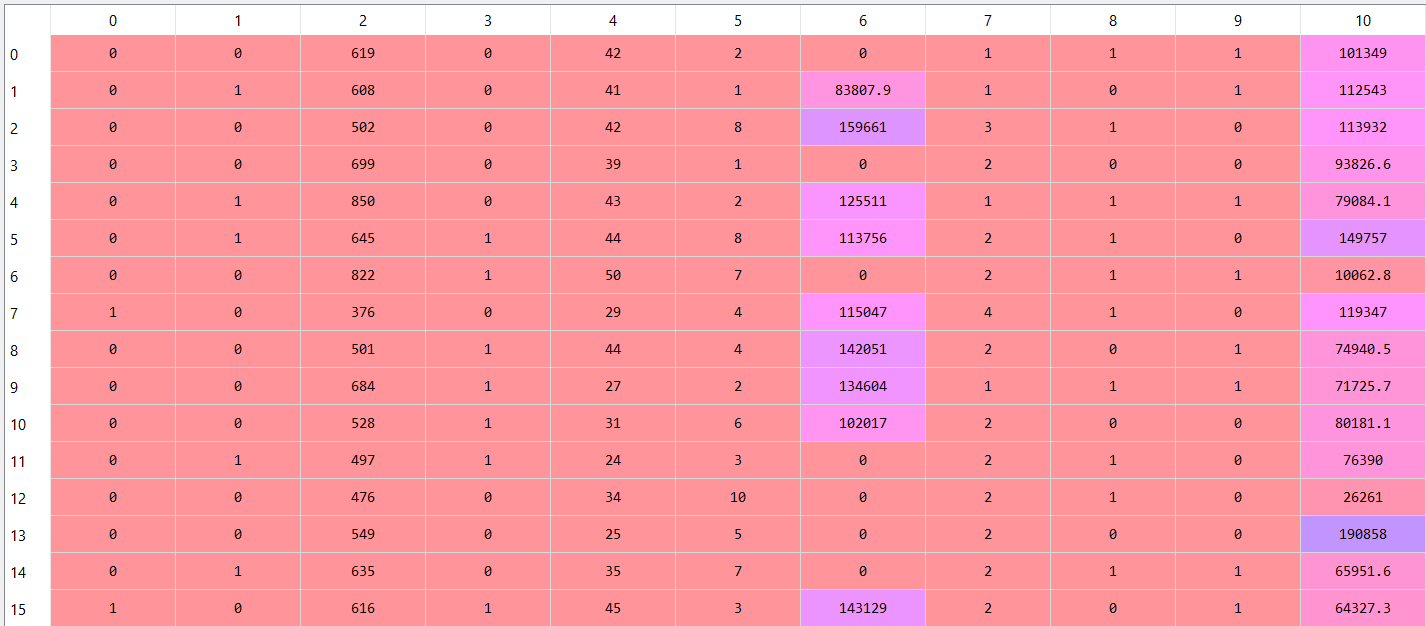

**Now Our whole data is in the form of numerical**
- we are ready to split our data into test and training set 

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**perform standadization to whole dataset**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

This is how our data is looks like after standardization

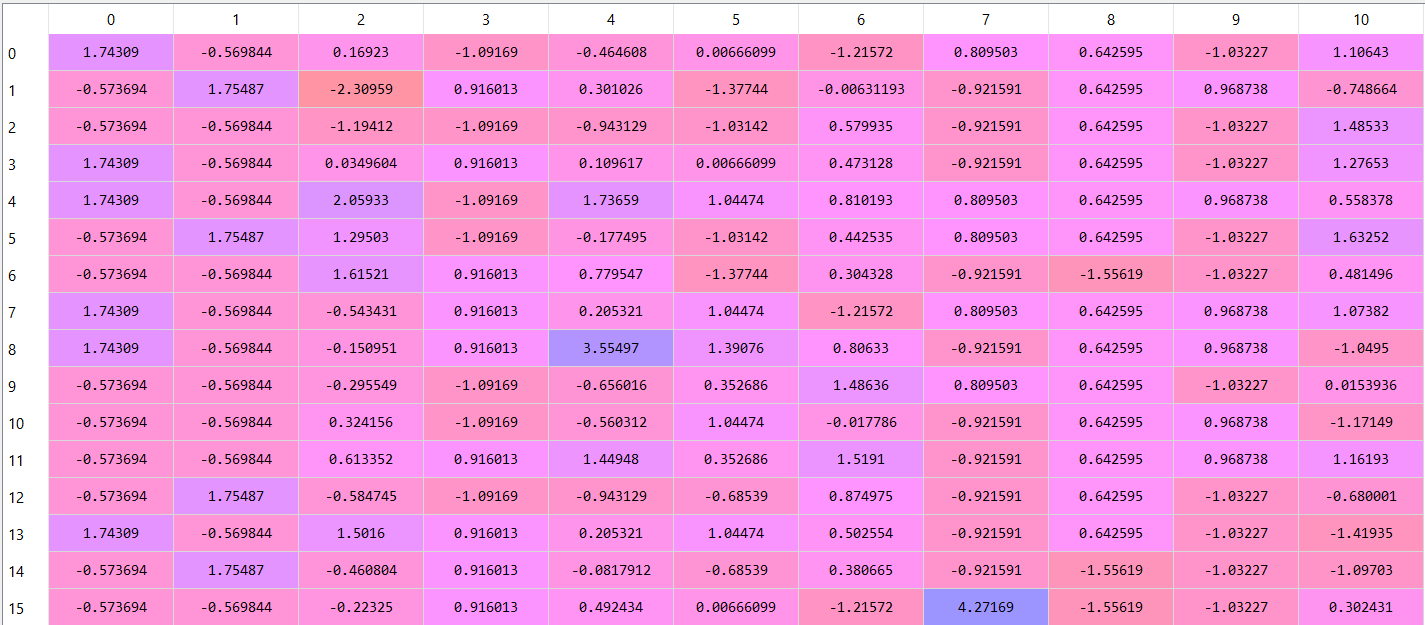

#### Till now data preprocessing is done 

- It's time to build a neural network to train it and test it

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Initialization of a classifier**

In [15]:
classifier = Sequential()

**Adding first layer to our neural network it has 11 inputs**

In [16]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

**Adding the second hidden layer**

In [17]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

**Adding the output layer**

In [18]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

**Compiling the ANN**

In [19]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Fitting the ANN to the Training set**

In [20]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 2s 195us/step - loss: 1.3800 - acc: 0.6518
Epoch 2/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.5001 - acc: 0.7961
Epoch 3/100
8000/8000 [==============================] - 1s 143us/step - loss: 0.4736 - acc: 0.8010
Epoch 4/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.4607 - acc: 0.8007
Epoch 5/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.4544 - acc: 0.8036
Epoch 6/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4462 - acc: 0.8076
Epoch 7/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.4377 - acc: 0.8130
Epoch 8/100
8000/8000 [==============================] - 1s 143us/step - loss: 0.4244 - acc: 0.8182
Epoch 9/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.4067 - acc: 0.8294 0s - loss: 0.42
Epoch 10/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.38

8000/8000 [==============================] - 1s 137us/step - loss: 0.3335 - acc: 0.8639
Epoch 82/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.3341 - acc: 0.8624
Epoch 83/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.3337 - acc: 0.8634
Epoch 84/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.3337 - acc: 0.8622
Epoch 85/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.3342 - acc: 0.8630
Epoch 86/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.3338 - acc: 0.8646
Epoch 87/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3329 - acc: 0.8635
Epoch 88/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.3333 - acc: 0.8627
Epoch 89/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.3341 - acc: 0.8641
Epoch 90/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.3339 - acc: 0.8619
Epo

**Now our classifier Neural Network is trained for predicting new data outcomes**
- And now test the data on the classifier

In [21]:
y_pred = classifier.predict(X_test)

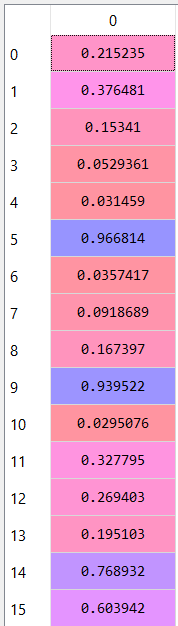

In [23]:
y_pred_bool = (y_pred > 0.5)

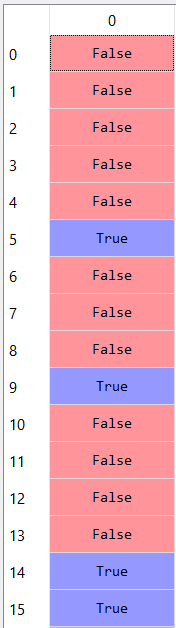

**Inorder to draw confusion metrix**

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bool)

In [31]:
print("Confusion matrix of this test data is :\n\n",cm)

Confusion matrix of this test data is :

 [[1525   70]
 [ 200  205]]


In [28]:
print("Accuracy of this neural network is :",((1525+205)/2000)*100,"%")

Accuracy of this neural network is : 86.5 %


### Predicting a single new observation
- """Predict if the customer with the following informations will leave the bank:
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40
- Tenure: 3
- Balance: 60000
- Number of Products: 2
- Has Credit Card: Yes
- Is Active Member: Yes
- Estimated Salary: 50000"""

In [32]:
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
print(new_prediction)
new_prediction = (new_prediction > 0.5)
print(new_prediction)

[[0.0224674]]
[[False]]
